In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
x = pd.read_csv("linearX.csv").values.flatten()
y = pd.read_csv("linearY.csv").values.flatten()

In [17]:
# Normalize data
x_mean, x_std = np.mean(x), np.std(x)
y_mean, y_std = np.mean(y), np.std(y)
x_normalized = (x - x_mean) / x_std
y_normalized = (y - y_mean) / y_std

In [18]:
class Linear_Regression:
    def __init__(self, lr=0.1, iterations=100, tolerance=1e-6):
        self.lr = lr
        self.iterations = iterations
        self.tolerance = tolerance
        self.theta0 = 0
        self.theta1 = 0
        self.cost_history = []

    def compute_cost(self, x, y):
        m = len(x)
        y_pred = self.theta0 + self.theta1 * x
        cost = (1 / m) * np.sum((y - y_pred) ** 2)
        return cost

    def fit_batch(self, x, y):
        m = len(x)
        prev_cost = float('inf')
        self.cost_history = []

        for _ in range(self.iterations):
            y_pred = self.theta0 + self.theta1 * x
            cost = self.compute_cost(x, y)
            self.cost_history.append(cost)

            if abs(prev_cost - cost) < self.tolerance:
                break
            prev_cost = cost

            d_theta0 = -(2 / m) * np.sum(y - y_pred)
            d_theta1 = -(2 / m) * np.sum((y - y_pred) * x)

            self.theta0 -= self.lr * d_theta0
            self.theta1 -= self.lr * d_theta1

    def fit_stochastic(self, x, y):
        m = len(x)
        self.cost_history = []

        for _ in range(self.iterations):
            for i in range(m):
                xi, yi = x[i], y[i]
                y_pred = self.theta0 + self.theta1 * xi
                d_theta0 = -2 * (yi - y_pred)
                d_theta1 = -2 * (yi - y_pred) * xi

                self.theta0 -= self.lr * d_theta0
                self.theta1 -= self.lr * d_theta1
            
            cost = self.compute_cost(x, y)
            self.cost_history.append(cost)

    def fit_minibatch(self, x, y, batch_size=10):
        m = len(x)
        self.cost_history = []

        for _ in range(self.iterations):
            indices = np.random.permutation(m)
            x_shuffled, y_shuffled = x[indices], y[indices]

            for i in range(0, m, batch_size):
                x_batch = x_shuffled[i:i+batch_size]
                y_batch = y_shuffled[i:i+batch_size]

                y_pred = self.theta0 + self.theta1 * x_batch
                d_theta0 = -(2 / len(x_batch)) * np.sum(y_batch - y_pred)
                d_theta1 = -(2 / len(x_batch)) * np.sum((y_batch - y_pred) * x_batch)

                self.theta0 -= self.lr * d_theta0
                self.theta1 -= self.lr * d_theta1
            
            cost = self.compute_cost(x, y)
            self.cost_history.append(cost)

    def predict(self, x):
        return self.theta0 + self.theta1 * x

In [19]:
model = Linear_Regression(lr=0.5, iterations=1000)

model.fit_batch(x_normalized, y_normalized)

print(f"Final cost: {model.cost_history[-1]}")
print(f"Theta0: {model.theta0}, Theta1: {model.theta1}")

Final cost: 0.028620171512080645
Theta0: 1.3457248783335243e-17, Theta1: 0.9855860330219373


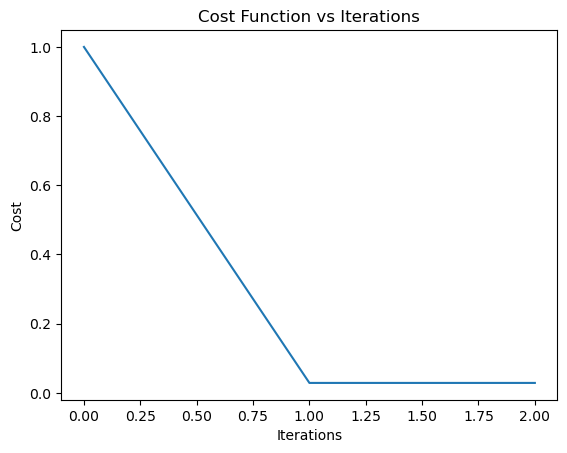

In [20]:
# Plotting cost history
plt.plot(model.cost_history[0:50])
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function vs Iterations')
plt.show()

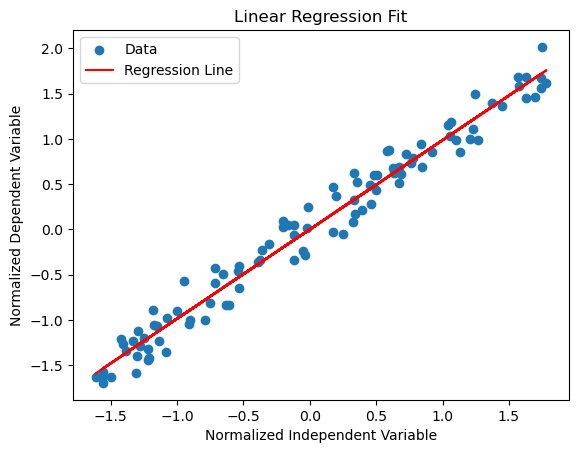

In [21]:
# Plotting regression line
plt.scatter(x_normalized, y_normalized, label='Data')
plt.plot(x_normalized, model.predict(x_normalized), color='red', label='Regression Line')
plt.xlabel('Normalized Independent Variable')
plt.ylabel('Normalized Dependent Variable')
plt.legend()
plt.title('Linear Regression Fit')
plt.show()

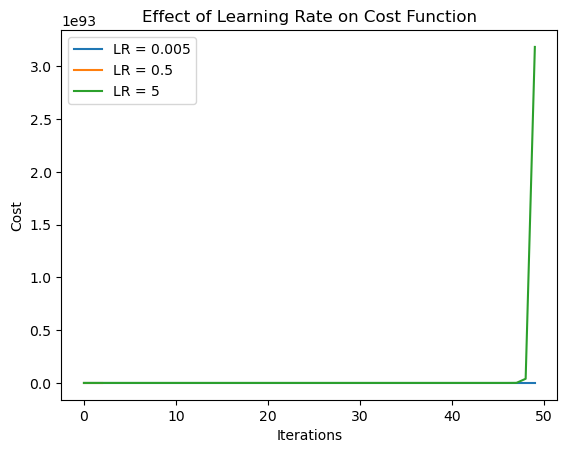

In [22]:
# Effect of Learning Rate
for lr in [0.005, 0.5, 5]:
    model = Linear_Regression(lr=lr, iterations=50)
    model.fit_batch(x_normalized, y_normalized)
    plt.plot(model.cost_history, label=f'LR = {lr}')
    
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Effect of Learning Rate on Cost Function')
plt.legend()
plt.show()


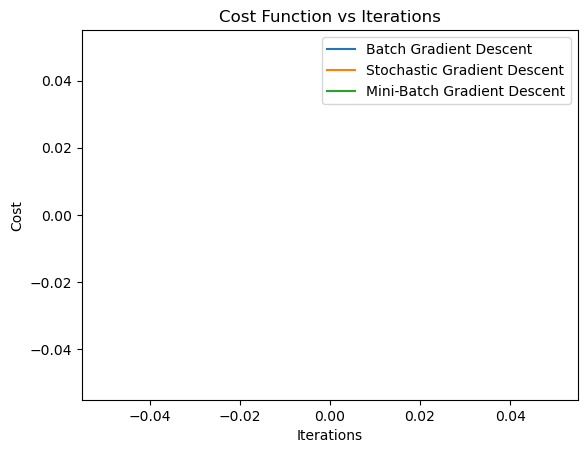

In [24]:
# Comparing different gradient descent methods
model.fit_batch(x_normalized, y_normalized)
cost_batch = model.cost_history

model.fit_stochastic(x_normalized, y_normalized)
cost_stochastic = model.cost_history

model.fit_minibatch(x_normalized, y_normalized, batch_size=10)
cost_minibatch = model.cost_history

plt.plot(cost_batch, label="Batch Gradient Descent")
plt.plot(cost_stochastic, label="Stochastic Gradient Descent")
plt.plot(cost_minibatch, label="Mini-Batch Gradient Descent")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function vs Iterations")
plt.legend()
plt.show()